In [1]:
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')
from scipy import stats

In [2]:
a = pd.read_csv("C:/Users/HP/Downloads/Churn_Modelling (1).csv")

In [3]:
len(a)

10000

In [4]:
a.shape

(10000, 14)

In [5]:
a.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#Deleting the 'RowNumber' Column from the data since it doesn't provide any useful
#information.
a = a.drop('RowNumber',axis=1)

In [7]:
a.shape

(10000, 13)

In [8]:
a.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
a.rename(columns={'EstimatedSalary':'Estimated_Salary','CustomerId':'Customer_ID','CreditScore':'Credit_score','NumOfProducts':'Num_Of_Products','HasCrCard':'Has_Credit_Card','IsActiveMember':'Is_Active_Member'},inplace= True)

In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   Credit_score      10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num_Of_Products   10000 non-null  int64  
 9   Has_Credit_Card   10000 non-null  int64  
 10  Is_Active_Member  10000 non-null  int64  
 11  Estimated_Salary  10000 non-null  float64
 12  Exited            10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
#Change the data type of the target. 
a['Exited'] = a['Exited'].astype("object")

In [12]:
a.describe()

# minimum and maximum age of the customer is 18,92
# maximum tenure for the subscription is 10 months
# minimum estimated salary is 11.58 ( which is not right)
# 75% of the customers lies in the age group of 18-44 yrs

,Customer_ID,Credit_score,Age,Tenure,Balance,Num_Of_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [13]:
a.describe(include=['O'])

,Surname,Geography,Gender,Exited
count,10000,10000,10000,10000
unique,2932,3,2,2
top,Smith,France,Male,0
freq,32,5014,5457,7963


In [14]:
a.nunique()

Customer_ID         10000
Surname              2932
Credit_score          460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num_Of_Products         4
Has_Credit_Card         2
Is_Active_Member        2
Estimated_Salary     9999
Exited                  2
dtype: int64

In [15]:
a.skew()

Customer_ID         0.001149
Credit_score       -0.071607
Age                 1.011320
Tenure              0.010991
Balance            -0.141109
Num_Of_Products     0.745568
Has_Credit_Card    -0.901812
Is_Active_Member   -0.060437
Estimated_Salary    0.002085
Exited              1.471611
dtype: float64

In [16]:
a.kurtosis()

Customer_ID        -1.196113
Credit_score       -0.425726
Age                 1.395347
Tenure             -1.165225
Balance            -1.489412
Num_Of_Products     0.582981
Has_Credit_Card    -1.186973
Is_Active_Member   -1.996747
Estimated_Salary   -1.181518
Exited              0.165671
dtype: float64

In [17]:
cat_columns = a.select_dtypes(include='object').columns
num_columns = a.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns: 
    print("Name of the Category---------", var)
    print(a[var].value_counts())

Name of the Category--------- Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Hingston     1
Horan        1
Ramsey       1
Willmore     1
Brodney      1
Name: Surname, Length: 2932, dtype: int64
Name of the Category--------- Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Name of the Category--------- Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
Name of the Category--------- Exited
0    7963
1    2037
Name: Exited, dtype: int64


In [19]:
for var in cat_columns: 
    insuf_Values = a[var].value_counts()[a[var].value_counts()<30].reset_index()
    a[var][a[var].isin(insuf_Values["index"])] = np.nan

In [20]:
a.isnull().sum().sort_values(ascending = False)

Surname             9968
Exited                 0
Estimated_Salary       0
Is_Active_Member       0
Has_Credit_Card        0
Num_Of_Products        0
Balance                0
Tenure                 0
Age                    0
Gender                 0
Geography              0
Credit_score           0
Customer_ID            0
dtype: int64

In [39]:
# One categorical One numerical column - Descriptive Statistics across the categories
for var in cat_columns: 
    print(a.groupby(var).median())

         Customer_ID  Credit_score   Age  Tenure     Balance  Num_Of_Products  \
Surname                                                                         
Smith     15673870.0         661.5  39.0     4.0  112185.745              2.0   

         Has_Credit_Card  Is_Active_Member  Estimated_Salary  
Surname                                                       
Smith                1.0               1.0          89292.92  
           Customer_ID  Credit_score  Age  Tenure    Balance  Num_Of_Products  \
Geography                                                                       
France        15690770           653   37       5   62153.50                1   
Germany       15689886           651   38       5  119703.10                1   
Spain         15691792           651   37       5   61710.44                2   

           Has_Credit_Card  Is_Active_Member  Estimated_Salary  
Geography                                                       
France                   1     

In [21]:
from itertools import product
cat_1 = a[cat_columns]
cat_2 = a[cat_columns]
d = list(product(cat_1,cat_2, repeat = 1))
d

[('Surname', 'Surname'),
 ('Surname', 'Geography'),
 ('Surname', 'Gender'),
 ('Surname', 'Exited'),
 ('Geography', 'Surname'),
 ('Geography', 'Geography'),
 ('Geography', 'Gender'),
 ('Geography', 'Exited'),
 ('Gender', 'Surname'),
 ('Gender', 'Geography'),
 ('Gender', 'Gender'),
 ('Gender', 'Exited'),
 ('Exited', 'Surname'),
 ('Exited', 'Geography'),
 ('Exited', 'Gender'),
 ('Exited', 'Exited')]

In [22]:
# Cross Tabulations of the categorical variables
for var1 in cat_columns:
    for var2 in cat_columns:
        print(pd.crosstab(a[var1], a[var2], normalize=True))

Surname  Smith
Surname       
Smith      1.0
Geography   France  Germany   Spain
Surname                            
Smith      0.71875  0.21875  0.0625
Gender   Female  Male
Surname              
Smith       0.5   0.5
Exited         0        1
Surname                  
Smith    0.71875  0.28125
Surname      Smith
Geography         
France     0.71875
Germany    0.21875
Spain      0.06250
Geography  France  Germany   Spain
Geography                         
France     0.5014   0.0000  0.0000
Germany    0.0000   0.2509  0.0000
Spain      0.0000   0.0000  0.2477
Gender     Female    Male
Geography                
France     0.2261  0.2753
Germany    0.1193  0.1316
Spain      0.1089  0.1388
Exited          0       1
Geography                
France     0.4204  0.0810
Germany    0.1695  0.0814
Spain      0.2064  0.0413
Surname  Smith
Gender        
Female     0.5
Male       0.5
Geography  France  Germany   Spain
Gender                            
Female     0.2261   0.1193  0.1089
Male    

In [23]:
import scipy.stats as ss
e = []
for i in d:
    if i[0] != i[1]:
        e.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            a[i[0]], a[i[1]])))[1]))
e
chi_test = pd.DataFrame(e, columns = ["var1", "var2", "p-value"])
chi_test

,var1,var2,p-value
0,Surname,Geography,1.000000e+00
1,Surname,Gender,1.000000e+00
2,Surname,Exited,1.000000e+00
3,Geography,Surname,1.000000e+00
4,Geography,Gender,3.145870e-02
5,Geography,Exited,3.830318e-66
6,Gender,Surname,1.000000e+00
7,Gender,Geography,3.145870e-02
8,Gender,Exited,2.248210e-26
9,Exited,Surname,1.000000e+00


In [24]:
a.corr()

,Customer_ID,Credit_score,Age,Tenure,Balance,Num_Of_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary
Customer_ID,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271
Credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
Num_Of_Products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
Has_Credit_Card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
Is_Active_Member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
Estimated_Salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


In [25]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 5: 
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))
    
for var in num_columns: 
    print(var)
    print(Zscore_outlier(a[var]))

Customer_ID
Outliers: []
Number of Outliers: 0
None
Credit_score
Outliers: []
Number of Outliers: 0
None
Age
Outliers: [92, 92]
Number of Outliers: 2
None
Tenure
Outliers: []
Number of Outliers: 0
None
Balance
Outliers: []
Number of Outliers: 0
None
Num_Of_Products
Outliers: []
Number of Outliers: 0
None
Has_Credit_Card
Outliers: []
Number of Outliers: 0
None
Is_Active_Member
Outliers: []
Number of Outliers: 0
None
Estimated_Salary
Outliers: []
Number of Outliers: 0
None


In [45]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 3 * iqr
    Upper_tail = q3 + 3 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))
    
for var in num_columns:
    print(var)
    print(iqr_outliers(a[var]))

Customer_ID
Outliers: []
Number of Outliers: 0
None
Credit_score
Outliers: []
Number of Outliers: 0
None
Age
Outliers: [82, 88, 85, 84, 84, 81, 92, 92, 81, 81, 81, 83]
Number of Outliers: 12
None
Tenure
Outliers: []
Number of Outliers: 0
None
Balance
Outliers: []
Number of Outliers: 0
None
Num_Of_Products
Outliers: []
Number of Outliers: 0
None
Has_Credit_Card
Outliers: []
Number of Outliers: 0
None
Is_Active_Member
Outliers: []
Number of Outliers: 0
None
Estimated_Salary
Outliers: []
Number of Outliers: 0
None


In [51]:
def Winsorization_outliers(df):
    out=[]
    q1 = df.quantile(0.005)
    q3 = df.quantile(0.995)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print(var)
    print("q1:", q1, "q3:",q3)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

for var in num_columns:        
    print(Winsorization_outliers(a[var]))   

Customer_ID
q1: 15567332.975000001 q3: 15814267.005
Outliers: [15566594, 15566111, 15566292, 15815364, 15814275, 15566091, 15566156, 15566251, 15814930, 15565701, 15814268, 15566211, 15814846, 15815660, 15566958, 15566843, 15815560, 15565779, 15566494, 15814536, 15815626, 15815490, 15566708, 15814816, 15815236, 15566689, 15814553, 15567114, 15815420, 15815628, 15565806, 15815530, 15814998, 15814465, 15565796, 15815428, 15566633, 15567328, 15566295, 15565706, 15566660, 15567063, 15566467, 15815131, 15567078, 15814923, 15566269, 15567246, 15566253, 15815690, 15566740, 15567013, 15815552, 15814430, 15814519, 15565891, 15815043, 15566988, 15814940, 15814468, 15566312, 15814750, 15566894, 15815070, 15566030, 15815615, 15815295, 15565878, 15566891, 15815271, 15565714, 15815040, 15815443, 15565996, 15566495, 15815095, 15566563, 15566380, 15814757, 15815656, 15814675, 15566790, 15815645, 15814772, 15567147, 15566735, 15815125, 15814331, 15815534, 15815316, 15814405, 15815259, 15566378, 1556587

### Visualization

In [26]:
len(num_columns)

9

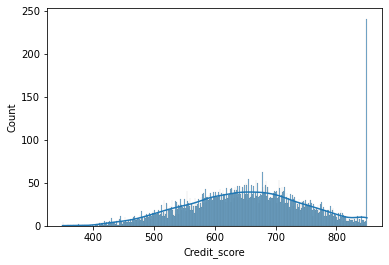

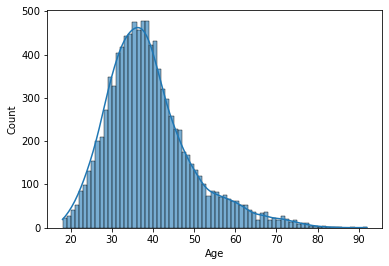

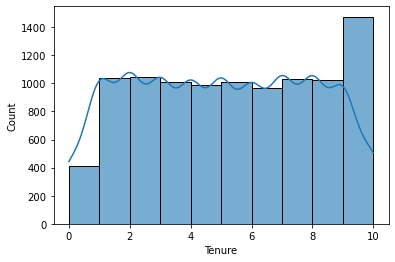

In [27]:
# Numerical Columns - Univariate - Histogram with Density Plot
for var in num_columns[1:4]: 
    plt.figure()
    sns.histplot(data = a, x = var, kde = True, alpha=0.6, binwidth=1)
    sns.kdeplot

<Figure size 1080x576 with 0 Axes>

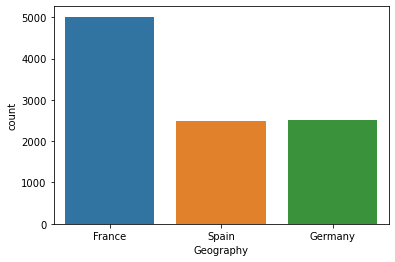

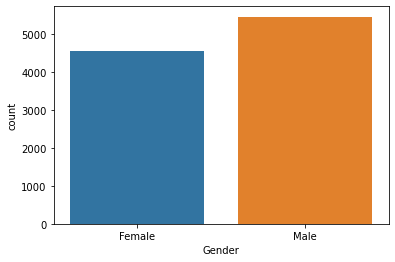

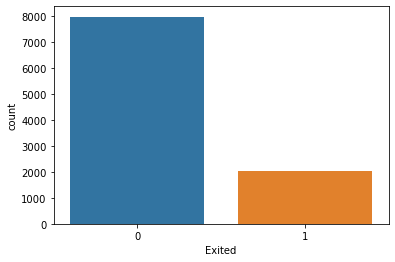

In [28]:
# Categorical Columns - Univariate - Simple Frequency Chart
plt.figure(figsize=(15,8))
for var in cat_columns[1:]: 
    plt.figure()
    sns.countplot(data = a, x = var)

<Figure size 1080x576 with 0 Axes>

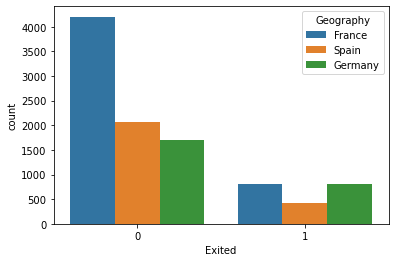

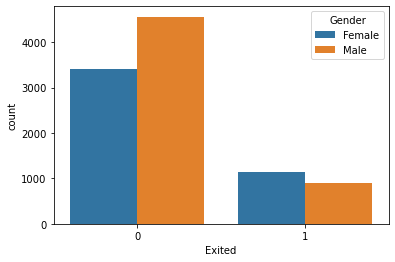

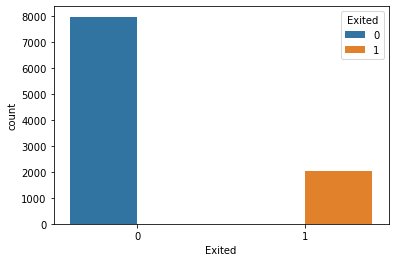

In [55]:
# Categorical Columns - Bivariate - Simple Frequency Chart distributed across categories
plt.figure(figsize=(15,8))
for var in cat_columns[1:]: 
    plt.figure()
    sns.countplot(data = a, x = "Exited", hue = var)

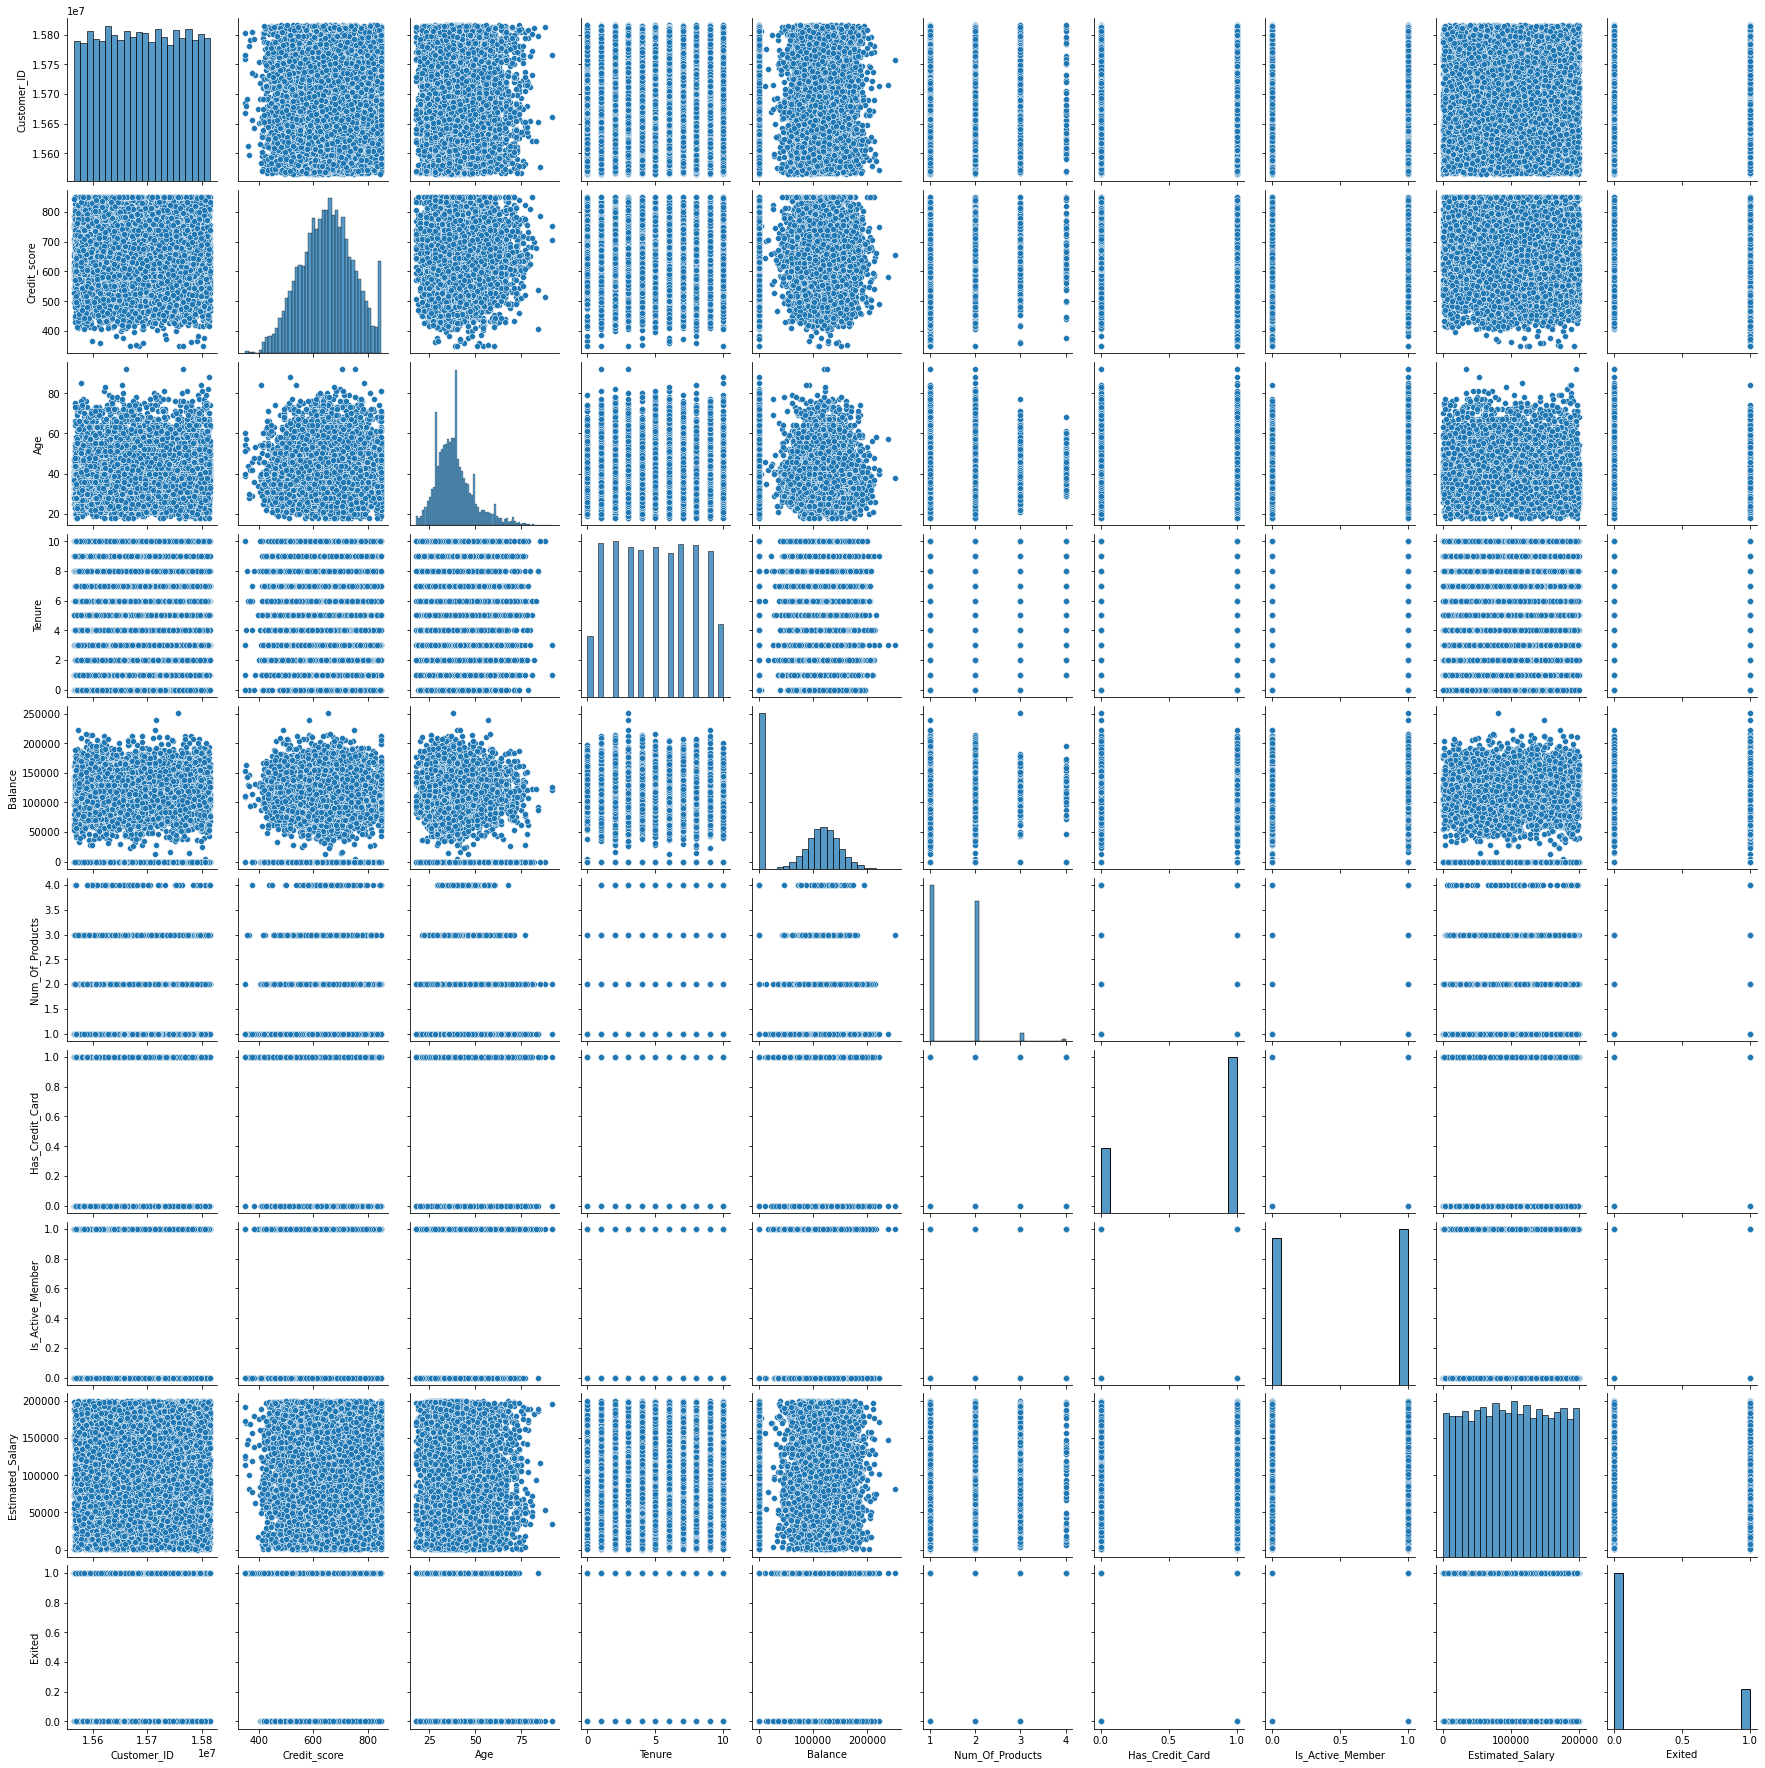

In [57]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix
# Subdivided by the Exited Variable
sns.pairplot(a)

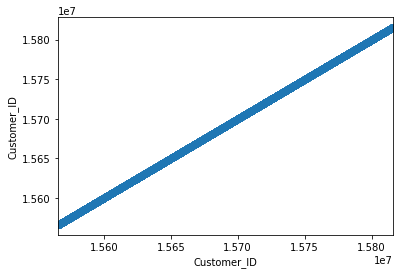

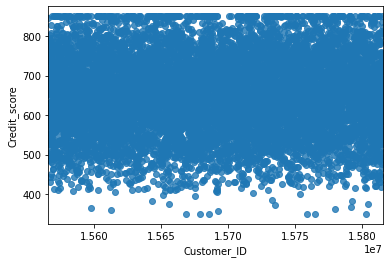

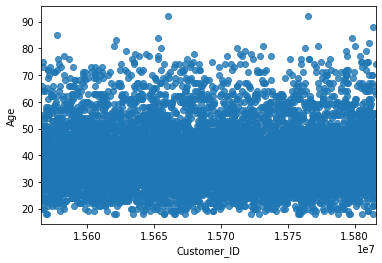

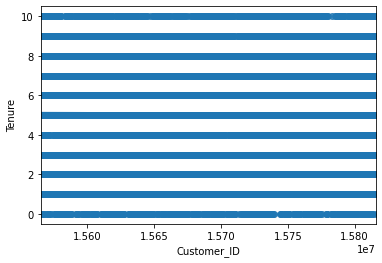

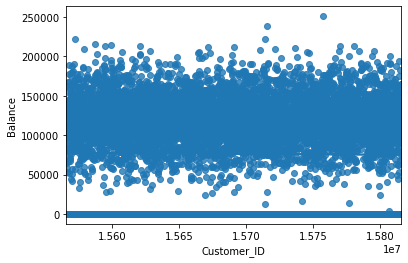

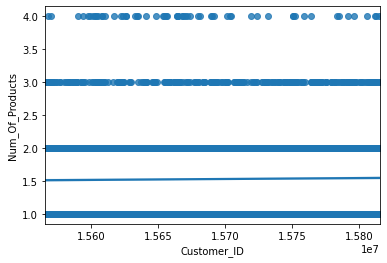

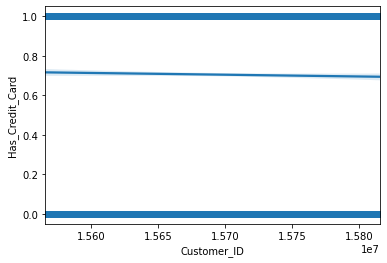

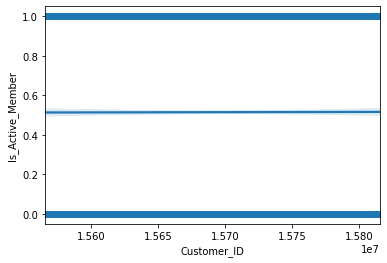

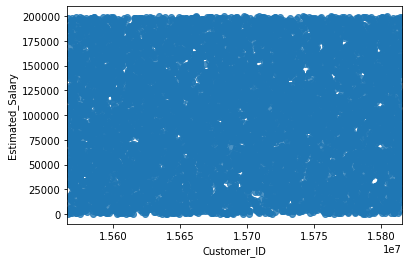

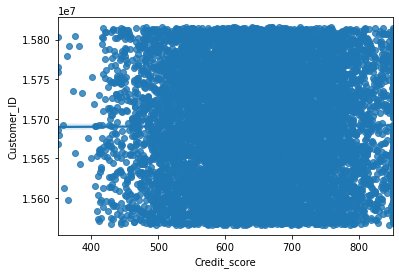

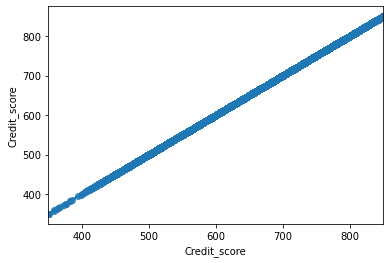

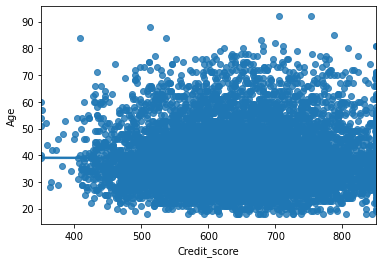

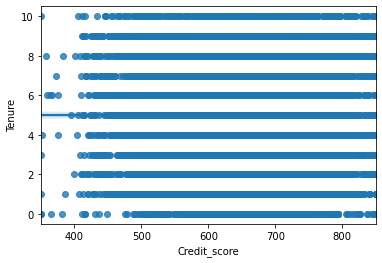

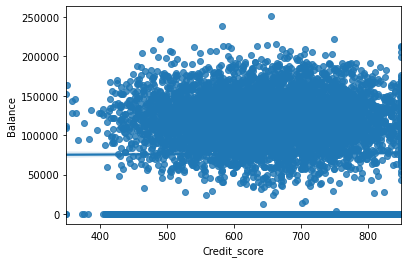

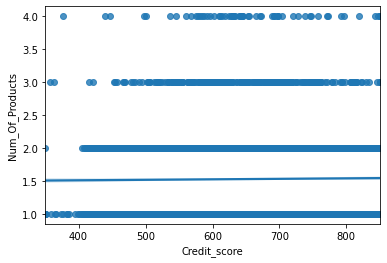

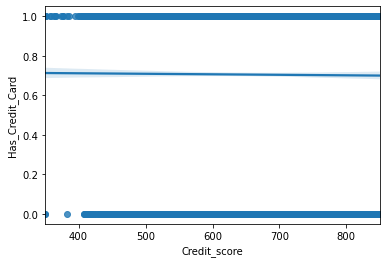

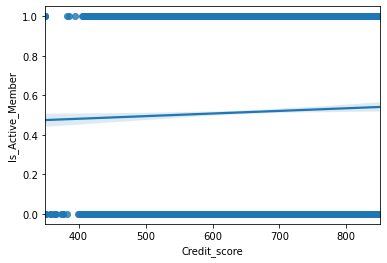

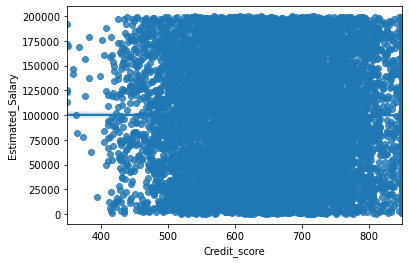

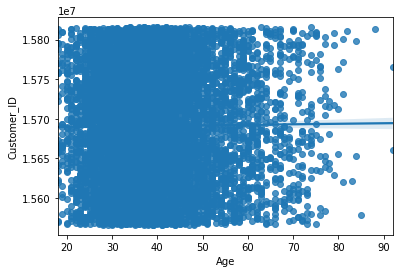

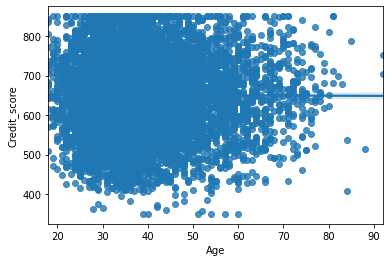

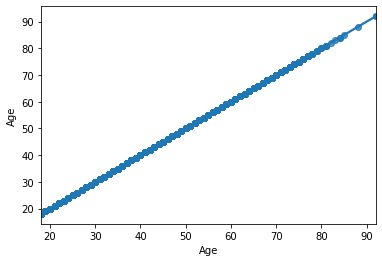

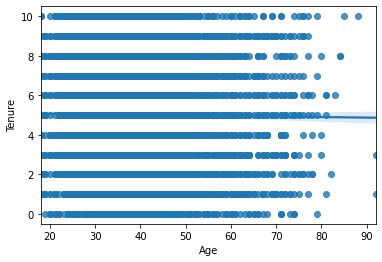

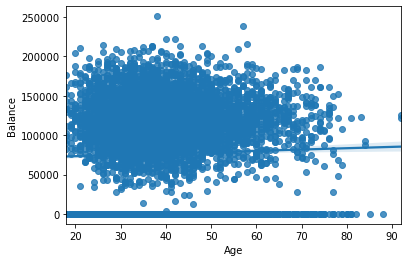

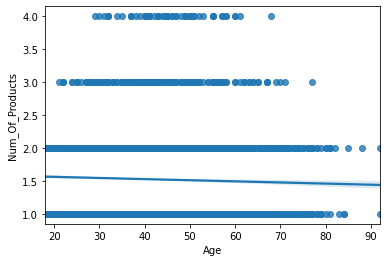

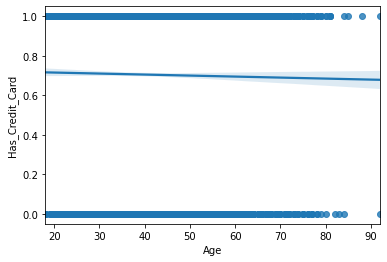

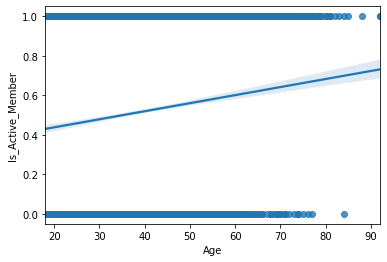

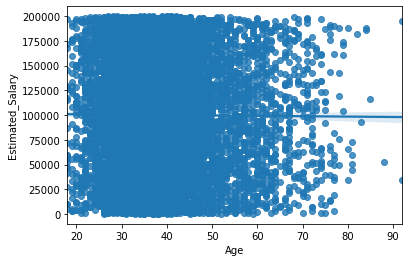

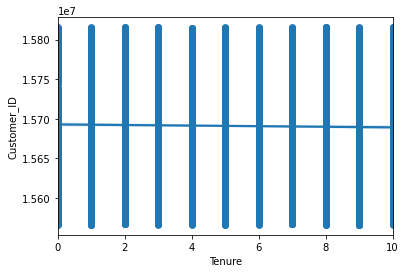

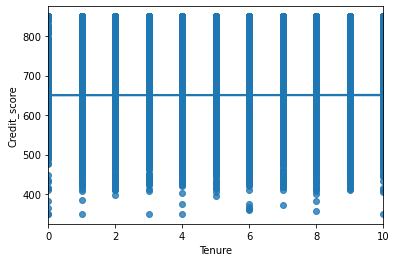

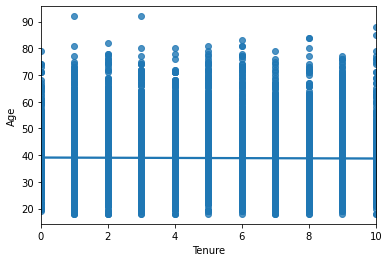

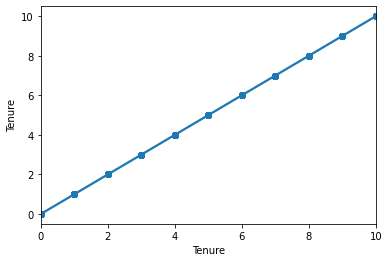

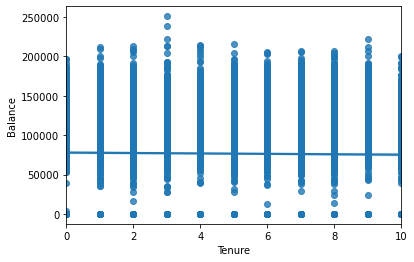

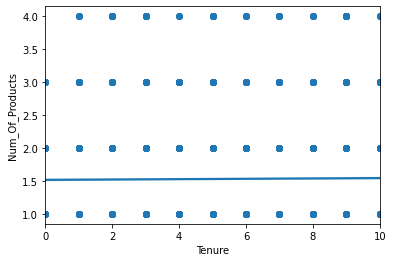

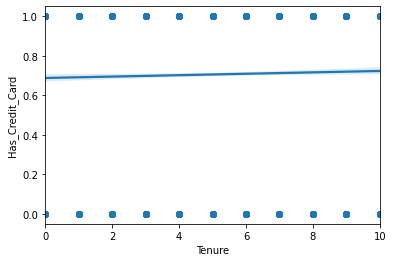

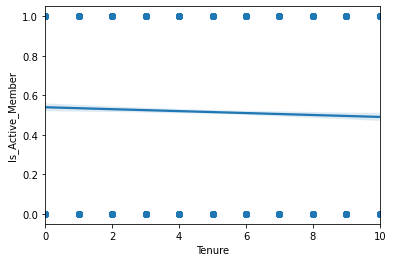

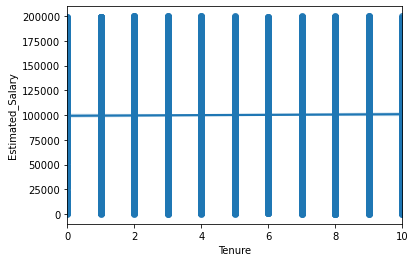

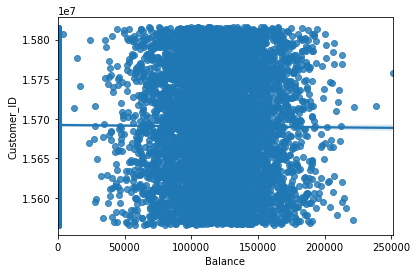

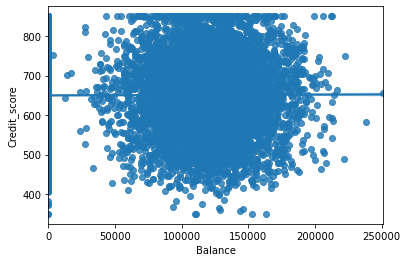

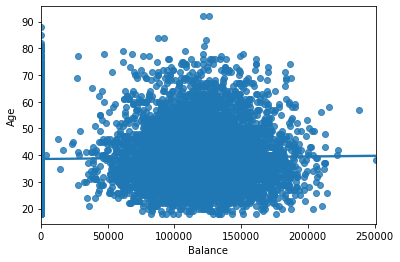

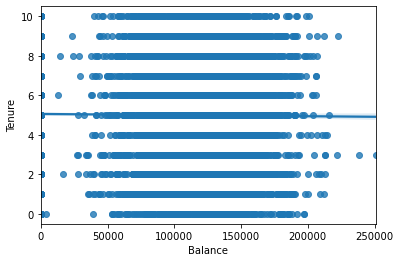

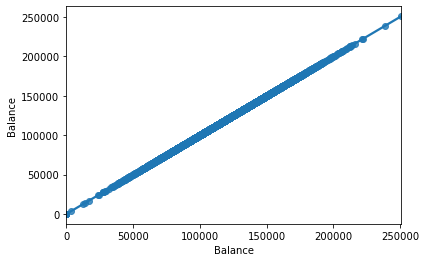

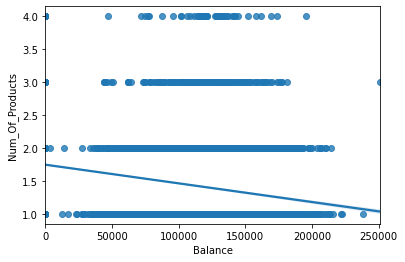

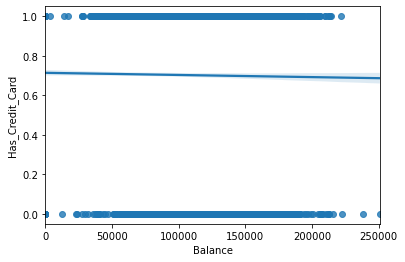

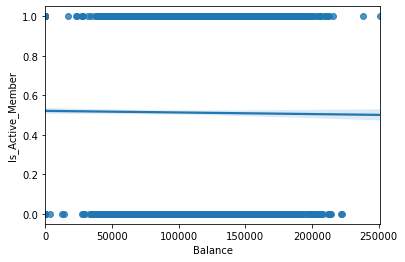

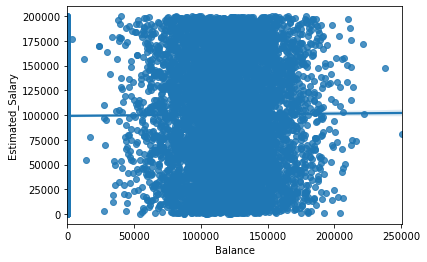

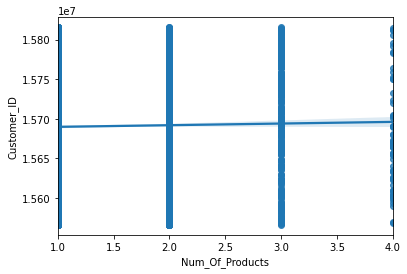

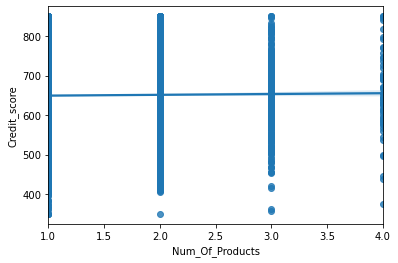

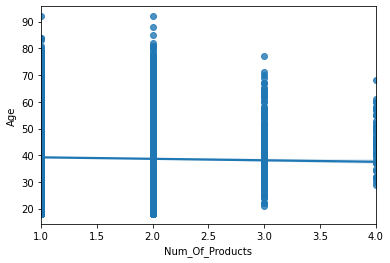

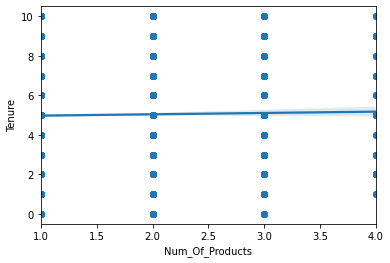

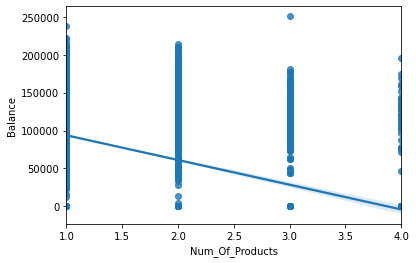

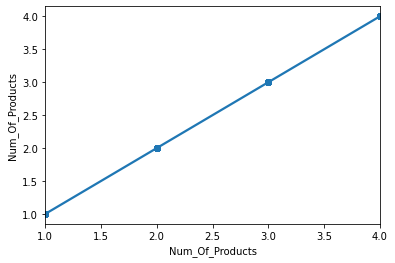

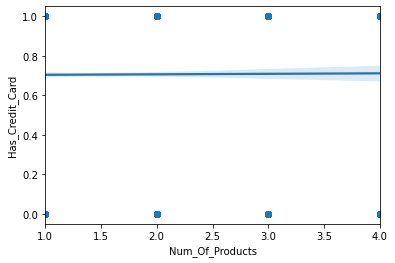

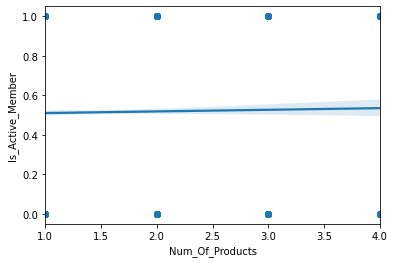

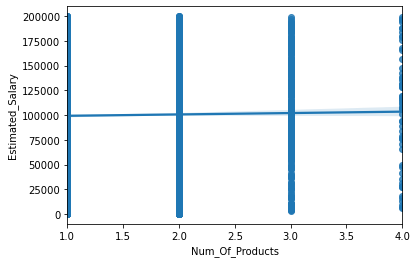

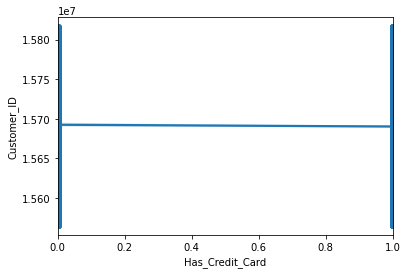

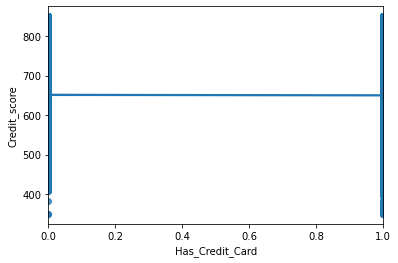

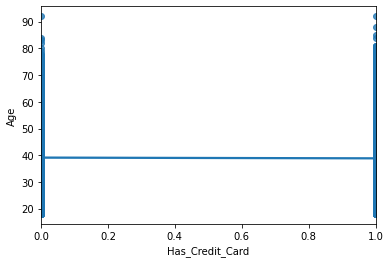

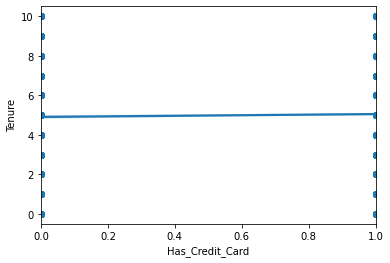

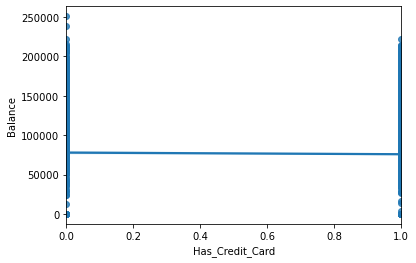

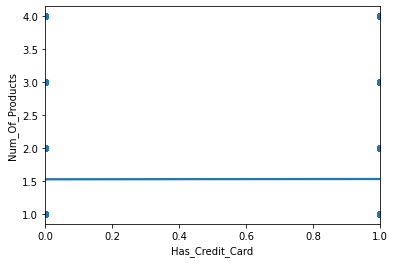

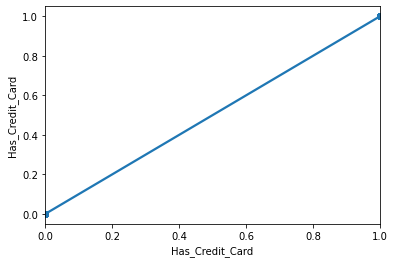

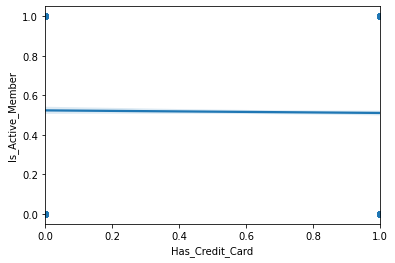

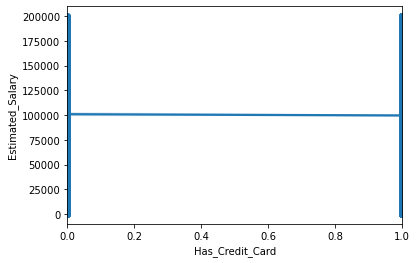

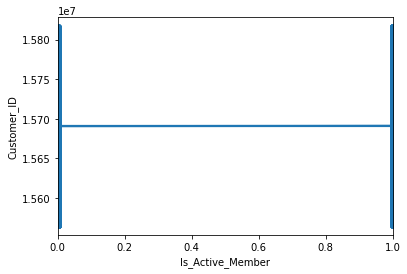

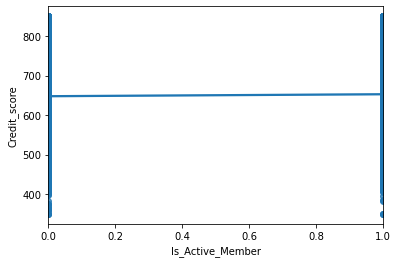

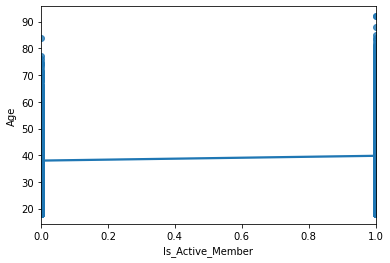

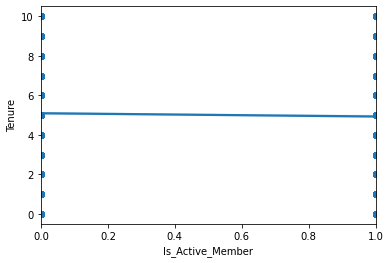

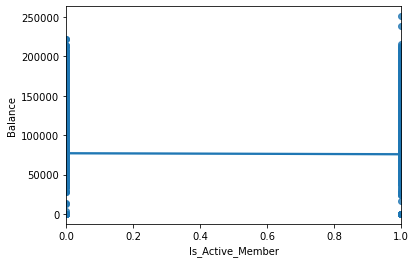

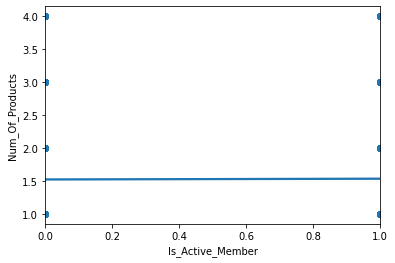

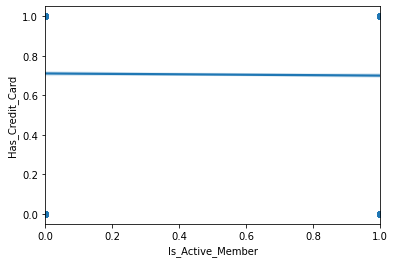

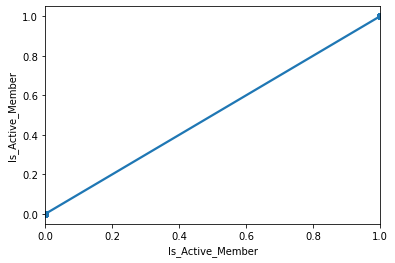

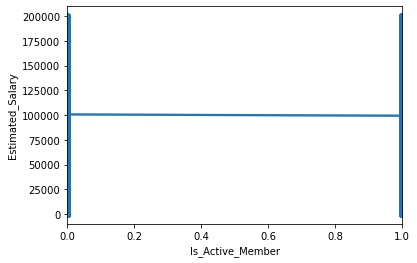

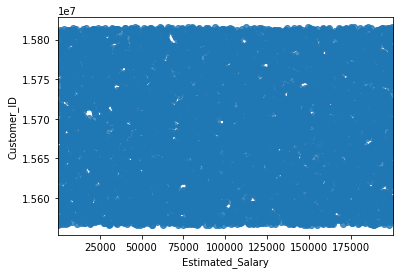

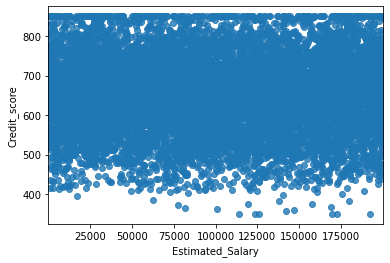

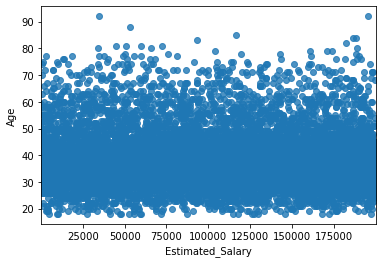

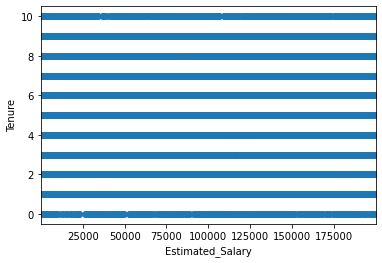

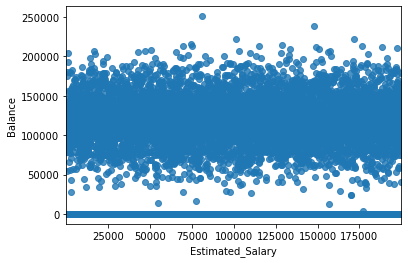

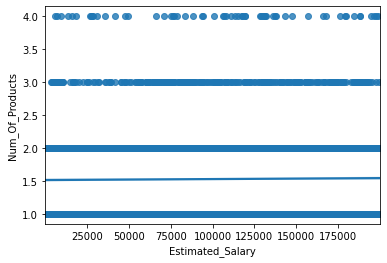

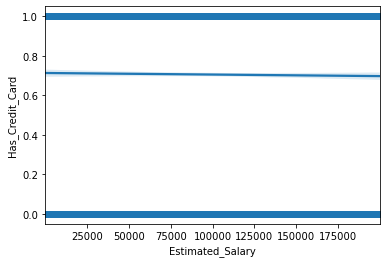

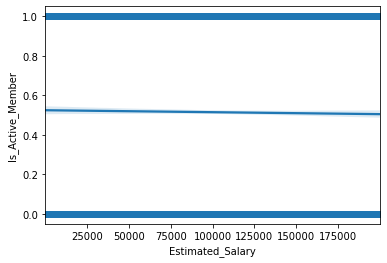

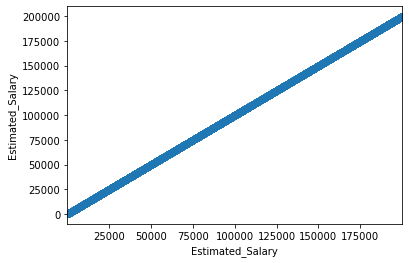

In [29]:
# Numerical - Numerical Regression Plot 
for var1 in num_columns:
    for var2 in num_columns:
        plt.figure()
        sns.regplot(data = a, x = var1, y = var2)

<AxesSubplot:>

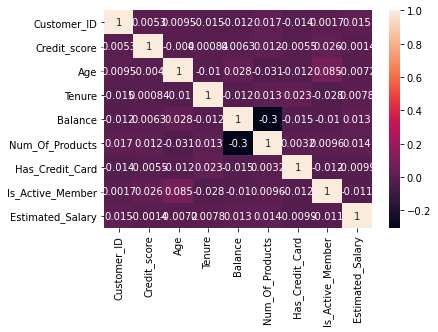

In [30]:
# Heatmap representation of correlation
sns.heatmap(a.corr(), annot=True)

<Figure size 720x288 with 0 Axes>

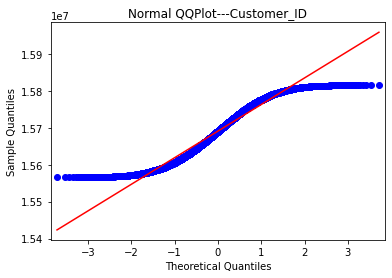

<Figure size 720x288 with 0 Axes>

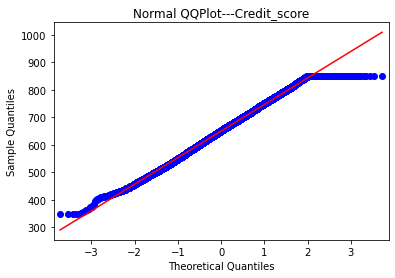

<Figure size 720x288 with 0 Axes>

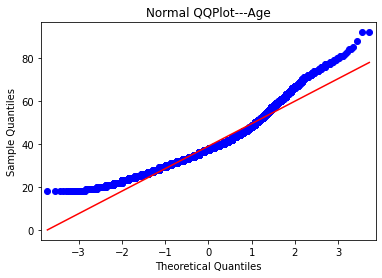

<Figure size 720x288 with 0 Axes>

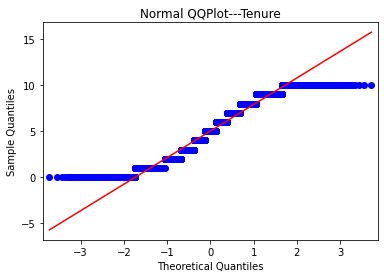

<Figure size 720x288 with 0 Axes>

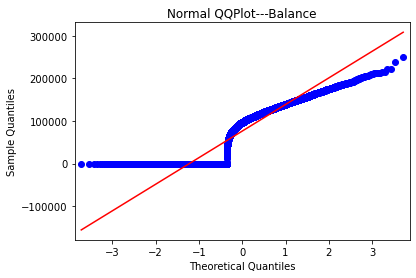

<Figure size 720x288 with 0 Axes>

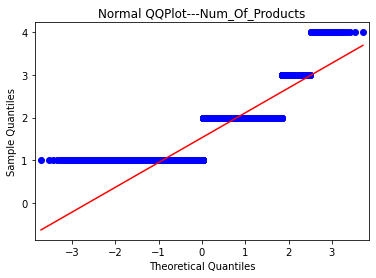

<Figure size 720x288 with 0 Axes>

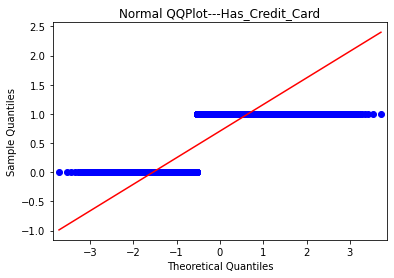

<Figure size 720x288 with 0 Axes>

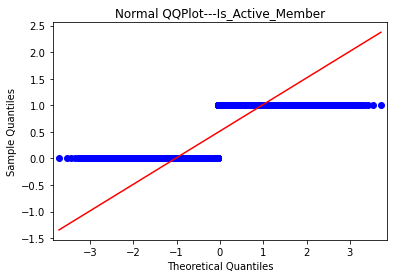

<Figure size 720x288 with 0 Axes>

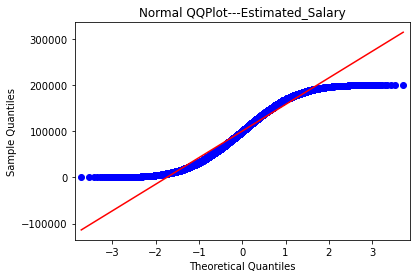

In [33]:
import statsmodels.api as sm
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot---"+var)
    plt.show()
for var in num_columns: 
    qq_plots(a[var])
    

### Scikit-Learn

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,QuantileTransformer
from sklearn.feature_selection import VarianceThreshold

In [35]:
# Separate the features variables from the Target Variables
X = a.drop(["Exited"],axis = 1)
y = a['Exited']

In [36]:
X.shape

(10000, 12)

In [37]:
# Have a list of categorical and numerical columns
categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [38]:
# Encoding Categorical Variables on the entire Feature data
X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =False,
              dtype='int8')
X

,Customer_ID,Credit_score,Age,Tenure,Balance,Num_Of_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Surname_Smith,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,0,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,0,0,1,0,0,1


In [39]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
X_train.shape

(7500, 15)

In [41]:
# Capture the columns of training data
col_names = X_train.columns

### Feature Selection

#### Constant Features Removal(Zero Variance Removal)

In [42]:
# Filter out any variables with a single constant value
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [43]:
constant_filter.get_support().sum()

15

In [44]:
constant_list = [not i for i in constant_filter.get_support()]


In [45]:
col_names = col_names[constant_filter.get_support()]

In [46]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [47]:
X_train = pd.DataFrame(constant_filter.transform(X_train),columns = col_names)
X_test = pd.DataFrame(constant_filter.transform(X_test),columns = col_names)

In [48]:
X_train.shape

(7500, 15)

### Remove Duplicate Features

In [49]:
X_train_T = X_train.T
X_test_T = X_test.T

In [50]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [51]:
X_train_T.shape, X_test_T.shape

((15, 7500), (15, 2500))

In [52]:
X_train_T.duplicated().sum()

0

In [53]:
duplicated_features = X_train_T.duplicated()
duplicated_features


Customer_ID          False
Credit_score         False
Age                  False
Tenure               False
Balance              False
Num_Of_Products      False
Has_Credit_Card      False
Is_Active_Member     False
Estimated_Salary     False
Surname_Smith        False
Geography_France     False
Geography_Germany    False
Geography_Spain      False
Gender_Female        False
Gender_Male          False
dtype: bool

### Correlated Feature Removal

In [54]:
corrmat = X_train.corr()

<AxesSubplot:>

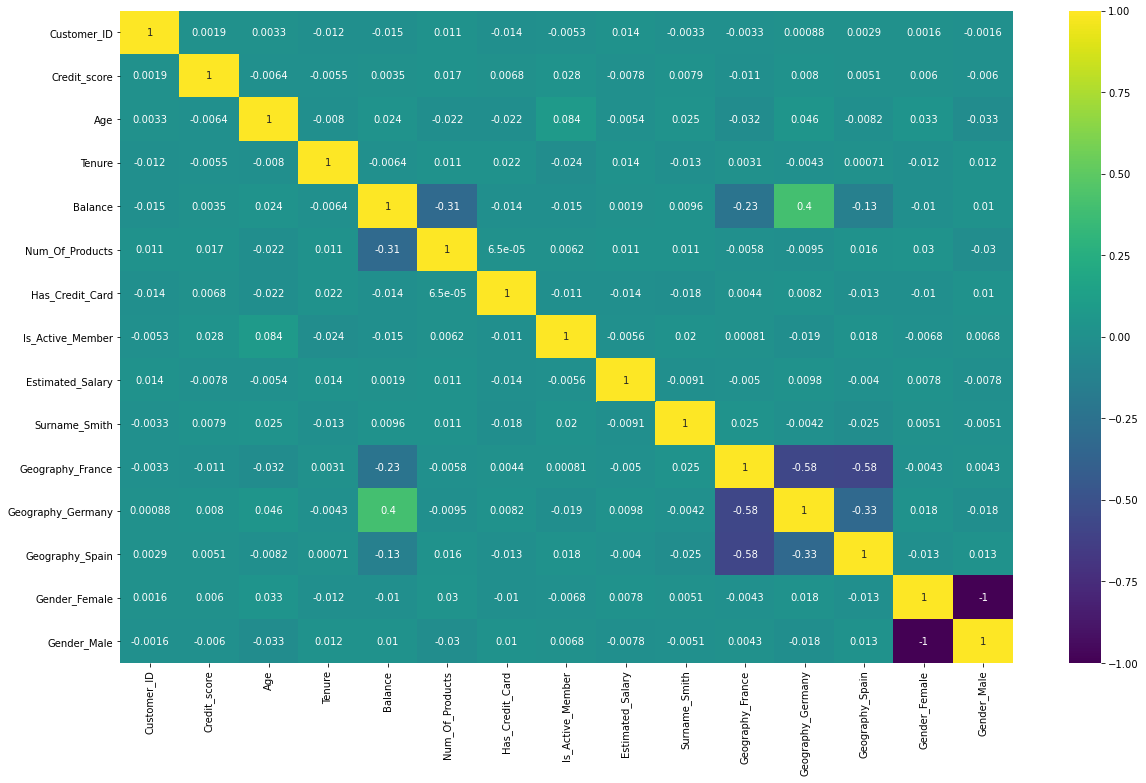

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot = True, cmap = 'viridis')

In [57]:
# Function to capture pair wise correlations greater than a set threshold
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [58]:
corr_features_1 = get_correlation(X_train, 1)
corr_features_1

set()

In [59]:
# Simple outright dropping of the correlated columns
X_train = X_train.drop(labels=corr_features_1, axis = 1)
X_test = X_test.drop(labels = corr_features_1, axis = 1)

In [60]:
col_names = col_names.drop(corr_features_1)

In [61]:
X_train.columns = col_names
X_test.columns = col_names

In [62]:
X_train.head()

,Customer_ID,Credit_score,Age,Tenure,Balance,Num_Of_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Surname_Smith,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15595324.0,579.0,39.0,5.0,117833.30,3.0,0.0,0.0,5831.00,0.0,0.0,1.0,0.0,1.0,0.0
1,15803457.0,750.0,32.0,5.0,0.00,2.0,1.0,0.0,95611.47,0.0,1.0,0.0,0.0,1.0,0.0
2,15644686.0,729.0,34.0,9.0,53299.96,2.0,1.0,1.0,42855.97,0.0,0.0,0.0,1.0,1.0,0.0
3,15777797.0,689.0,38.0,5.0,75075.14,1.0,1.0,1.0,8651.92,0.0,0.0,0.0,1.0,0.0,1.0
4,15747542.0,605.0,52.0,7.0,0.00,2.0,1.0,1.0,173952.50,0.0,1.0,0.0,0.0,0.0,1.0


### Feature Grouping and Feature Importance

In [63]:
# Take paiwise correlation
corrmat = X_train.corr()

In [64]:
corr_features_1 = get_correlation(X_train, 0.95)
corr_features_1

{'Gender_Male'}

In [65]:
corrdata = corrmat.abs().stack()
corrdata

Customer_ID  Customer_ID          1.000000
             Credit_score         0.001873
             Age                  0.003337
             Tenure               0.011660
             Balance              0.015050
                                    ...   
Gender_Male  Geography_France     0.004325
             Geography_Germany    0.017678
             Geography_Spain      0.012570
             Gender_Female        1.000000
             Gender_Male          1.000000
Length: 225, dtype: float64

In [66]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

Gender_Male       Gender_Male         1.000000
Gender_Female     Gender_Male         1.000000
Credit_score      Credit_score        1.000000
Age               Age                 1.000000
Tenure            Tenure              1.000000
                                        ...   
Is_Active_Member  Geography_France    0.000810
Tenure            Geography_Spain     0.000712
Geography_Spain   Tenure              0.000712
Num_Of_Products   Has_Credit_Card     0.000065
Has_Credit_Card   Num_Of_Products     0.000065
Length: 225, dtype: float64

In [67]:
corrdata = corrdata[corrdata>0.95]
corrdata = corrdata[corrdata<1]
corrdata

Series([], dtype: float64)

In [68]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value


### Feature Selection Based on Mutual Information

In [69]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [70]:
z = mutual_info_classif(X_train, y_train.astype(int))

In [72]:
z = pd.Series(z)
z.index = X_train.columns
z.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

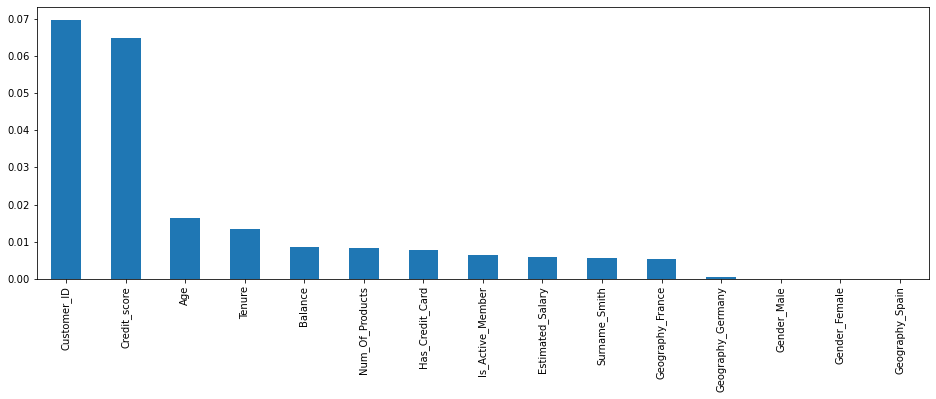

In [73]:
z.plot.bar(figsize = (16,5))

In [74]:
y = SelectPercentile(mutual_info_classif, percentile=88).fit(X_train, y_train.astype(int))

In [75]:
X_train.columns[y.get_support()]

Index(['Customer_ID', 'Age', 'Tenure', 'Balance', 'Num_Of_Products',
       'Has_Credit_Card', 'Is_Active_Member', 'Estimated_Salary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [76]:
col_names_01 = col_names[y.get_support()]

In [77]:
y.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [78]:
X_train = y.transform(X_train)
X_test = y.transform(X_test)

In [79]:
X_train = pd.DataFrame(X_train,columns = col_names_01)
X_test = pd.DataFrame(X_test,columns = col_names_01)
X_train.head()

,Customer_ID,Age,Tenure,Balance,Num_Of_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15595324.0,39.0,5.0,117833.30,3.0,0.0,0.0,5831.00,0.0,1.0,0.0,1.0,0.0
1,15803457.0,32.0,5.0,0.00,2.0,1.0,0.0,95611.47,1.0,0.0,0.0,1.0,0.0
2,15644686.0,34.0,9.0,53299.96,2.0,1.0,1.0,42855.97,0.0,0.0,1.0,1.0,0.0
3,15777797.0,38.0,5.0,75075.14,1.0,1.0,1.0,8651.92,0.0,0.0,1.0,0.0,1.0
4,15747542.0,52.0,7.0,0.00,2.0,1.0,1.0,173952.50,1.0,0.0,0.0,0.0,1.0


### Feature Selection Based on F Score

In [80]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [81]:
y = f_classif(X_train, y_train)
y

(array([6.29850959e-02, 6.41981506e+02, 7.01737895e+00, 1.12294789e+02,
        2.27485556e+01, 4.28930034e-01, 1.64039849e+02, 1.65535136e+00,
        9.94858278e+01, 2.43651292e+02, 1.45093751e+01, 8.98321206e+01,
        8.98321206e+01]),
 array([8.01845482e-001, 5.73554666e-136, 8.08915269e-003, 4.70416149e-026,
        1.88130024e-006, 5.12534522e-001, 3.62913542e-037, 1.98271866e-001,
        2.75827415e-023, 4.43582427e-054, 1.40577700e-004, 3.40582018e-021,
        3.40582018e-021]))

In [82]:
p_values = pd.Series(y[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

<AxesSubplot:>

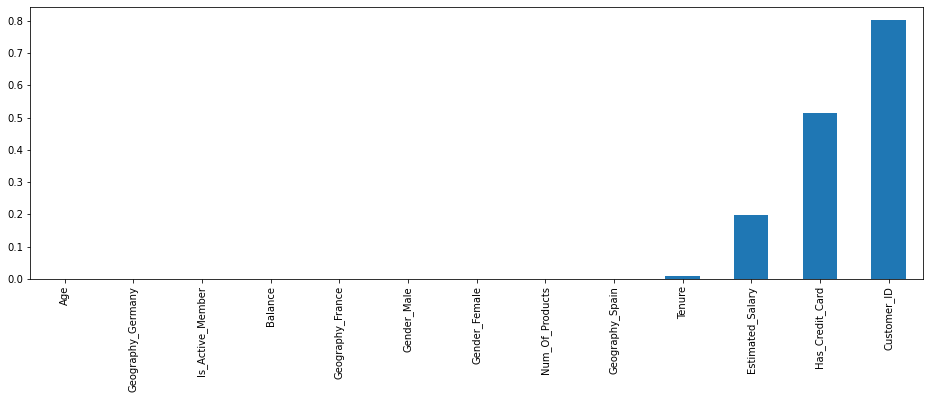

In [83]:
p_values.plot.bar(figsize = (16, 5))

In [84]:
p_values = p_values[p_values<0.05]

In [85]:
p_values.index

Index(['Age', 'Geography_Germany', 'Is_Active_Member', 'Balance',
       'Geography_France', 'Gender_Male', 'Gender_Female', 'Num_Of_Products',
       'Geography_Spain', 'Tenure'],
      dtype='object')

In [86]:
X_train_p = X_train[p_values.index]
X_test_p  = X_test[p_values.index]

In [87]:
col_names_02 = X_train_p.columns

In [88]:
X_train_p.shape

(7500, 10)

### Feature Transformation

In [89]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)
bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train_p)
X_train = pd.DataFrame(bctrans.transform(X_train_p),columns = col_names_02)
X_test = pd.DataFrame(bctrans.transform(X_test_p),columns = col_names_02)
X_train.head()

,Age,Geography_Germany,Is_Active_Member,Balance,Geography_France,Gender_Male,Gender_Female,Num_Of_Products,Geography_Spain,Tenure
0,0.177589,1.760216,-1.034460,0.767237,-1.015588,-1.087261,1.087261,1.845061,-0.574682,0.081441
1,-0.600674,-0.568112,-1.034460,-1.303200,0.984651,-1.087261,1.087261,0.922543,-0.574682,0.081441
2,-0.358375,-0.568112,0.966688,0.500078,-1.015588,-1.087261,1.087261,0.922543,1.740094,1.323787
3,0.077430,-0.568112,0.966688,0.611882,-1.015588,0.919743,-0.919743,-0.979691,1.740094,0.081441
4,1.246514,-0.568112,0.966688,-1.303200,0.984651,0.919743,-0.919743,0.922543,-0.574682,0.724169


In [90]:
X_train.skew()

Age                 -0.001568
Geography_Germany    1.192342
Is_Active_Member    -0.067786
Balance             -0.524213
Geography_France    -0.030943
Gender_Male         -0.167551
Gender_Female        0.167551
Num_Of_Products      0.133873
Geography_Spain      1.165645
Tenure              -0.170893
dtype: float64

In [91]:
X_train.kurt()

Age                  0.084267
Geography_Germany   -0.578474
Is_Active_Member    -1.995937
Balance             -1.702454
Geography_France    -1.999576
Gender_Male         -1.972453
Gender_Female       -1.972453
Num_Of_Products     -1.719542
Geography_Spain     -0.641442
Tenure              -1.080823
dtype: float64

In [92]:
X_train.describe()

,Age,Geography_Germany,Is_Active_Member,Balance,Geography_France,Gender_Male,Gender_Female,Num_Of_Products,Geography_Spain,Tenure
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,1.771753e-15,-5.894544e-16,-6.776505e-16,-4.459692e-16,-2.563283e-16,-9.787726e-17,2.966516e-17,-2.271664e-16,1.706043e-16,-4.813039e-16
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-3.069159e+00,-5.681121e-01,-1.034460e+00,-1.303200e+00,-1.015588e+00,-1.087261e+00,-9.197427e-01,-9.796913e-01,-5.746816e-01,-1.932854e+00
25%,-6.006737e-01,-5.681121e-01,-1.034460e+00,-1.303200e+00,-1.015588e+00,-1.087261e+00,-9.197427e-01,-9.796913e-01,-5.746816e-01,-1.012953e+00
50%,-2.603599e-02,-5.681121e-01,9.666879e-01,6.965688e-01,9.846511e-01,9.197427e-01,-9.197427e-01,-9.796913e-01,-5.746816e-01,8.144067e-02
75%,6.347592e-01,-5.681121e-01,9.666879e-01,7.948787e-01,9.846511e-01,9.197427e-01,1.087261e+00,9.225431e-01,-5.746816e-01,7.241694e-01
max,2.907524e+00,1.760216e+00,9.666879e-01,1.030132e+00,9.846511e-01,9.197427e-01,1.087261e+00,2.386367e+00,1.740094e+00,1.611011e+00


In [93]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = col_names_02)
X_test = pd.DataFrame(scaler.transform(X_test),columns = col_names_02)
X_train.head()

,Age,Geography_Germany,Is_Active_Member,Balance,Geography_France,Gender_Male,Gender_Female,Num_Of_Products,Geography_Spain,Tenure
0,0.177589,1.760216,-1.034460,0.767237,-1.015588,-1.087261,1.087261,1.845061,-0.574682,0.081441
1,-0.600674,-0.568112,-1.034460,-1.303200,0.984651,-1.087261,1.087261,0.922543,-0.574682,0.081441
2,-0.358375,-0.568112,0.966688,0.500078,-1.015588,-1.087261,1.087261,0.922543,1.740094,1.323787
3,0.077430,-0.568112,0.966688,0.611882,-1.015588,0.919743,-0.919743,-0.979691,1.740094,0.081441
4,1.246514,-0.568112,0.966688,-1.303200,0.984651,0.919743,-0.919743,0.922543,-0.574682,0.724169


In [94]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Basic Perceptron

In [95]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [96]:
model = Perceptron()
model.fit(X_train,y_train)
model.coef_

array([[ 2.69567652,  1.64845633, -2.76451917,  0.96628221,  1.10839925,
        -0.41718909,  0.41718909, -3.3581735 , -2.9215554 , -0.69370893]])

In [97]:
# Accuracy on training data
model.score(X_train,y_train)

0.7756

In [98]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)

0.7768
0.6507495912352146
0.44422310756972117
0.4505050505050505
0.4381139489194499
Cohen_Kappa_Score: 0.30461743989551815
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1991
           1       0.45      0.44      0.44       509

    accuracy                           0.78      2500
   macro avg       0.65      0.65      0.65      2500
weighted avg       0.77      0.78      0.78      2500



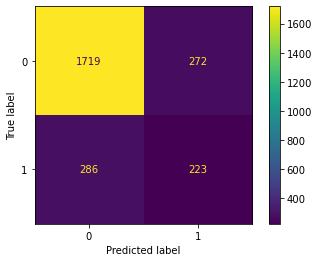

In [99]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print("Cohen_Kappa_Score:",cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [100]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.7394666666666666, 0.6172651103194797, 0.6908703062949739)

### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [102]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.coef_

array([[ 0.86906745,  0.25409581, -0.49382619,  0.08453181, -0.15221802,
        -0.13915016,  0.13915016, -0.28626854, -0.07646258, -0.08540299]])

In [103]:
model.score(X_train,y_train)

0.8184

In [104]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.8188
0.6178920071559739
0.38534599728629576
0.6228070175438597
0.27897838899803534
Cohen_Kappa_Score: 0.2967568225455106
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1991
           1       0.62      0.28      0.39       509

    accuracy                           0.82      2500
   macro avg       0.73      0.62      0.64      2500
weighted avg       0.79      0.82      0.79      2500

0.7812109305233077


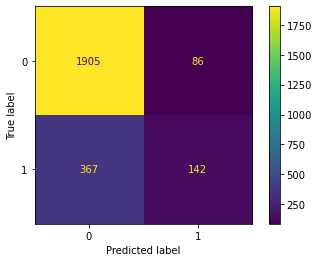

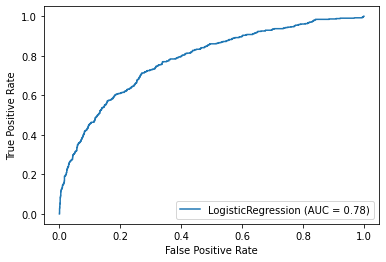

In [105]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print("Cohen_Kappa_Score:",cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [106]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.8178666666666666, 0.6034056428906529, 0.7752652902539966)

In [107]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'penalty':['l1','l2','elasticnet','none'],
              'C':[0.01,0.1,1,10,100],
              'fit_intercept':[True, False]}

In [108]:
# Initiate your model
model = LogisticRegression(random_state = 0)
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc')

In [109]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
{'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}
{'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}


In [111]:
y_pred = grid_search_acc.predict(X_test)

In [112]:
grid_search_acc

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [113]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("Cohen_Kappa_Score:",cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8196
0.6169318909552712
0.3830369357045144
0.6306306306306306
0.275049115913556
[[1909   82]
 [ 369  140]]
Cohen_Kappa_Score: 0.2959742841728774
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1991
           1       0.63      0.28      0.38       509

    accuracy                           0.82      2500
   macro avg       0.73      0.62      0.64      2500
weighted avg       0.80      0.82      0.79      2500

0.7812109305233077


### SGD Classifier 

In [114]:
model = SGDClassifier(loss = 'log')
model.fit(X_train,y_train)
model.coef_

array([[ 0.93493393,  0.32534196, -0.77061516,  0.05508471, -0.05191557,
        -0.05713877,  0.05713877, -0.20049098, -0.26336898,  0.07404317]])

In [115]:
model.score(X_test,y_test)

0.8196

In [116]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.8196
0.6461794183846958
0.44389642416769426
0.5960264900662252
0.35363457760314343
Cohen_Kappa_Score: 0.34450113484149436
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1991
           1       0.60      0.35      0.44       509

    accuracy                           0.82      2500
   macro avg       0.72      0.65      0.67      2500
weighted avg       0.80      0.82      0.80      2500

0.7825923926825923


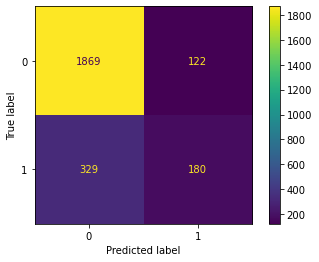

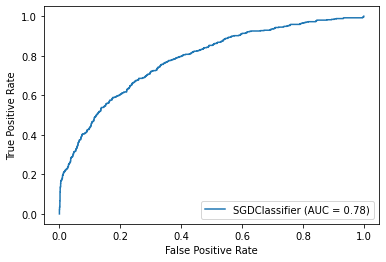

In [117]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print("Cohen_Kappa_Score:",cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

### KNN Classifier 

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
knn_model.score(X_test,y_test)

0.8364

In [120]:
y_pred = knn_model.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred)

0.8364

In [122]:
confusion_matrix(y_test,y_pred)

array([[1842,  149],
       [ 260,  249]], dtype=int64)

In [123]:
cohen_kappa_score(y_test,y_pred)

0.450958366266882

In [124]:
y_pred_proba = knn_model.predict_proba(X_test)

In [125]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.7934995298094865

In [126]:
np.round(np.sqrt(X_train.shape[0]),0)

87.0

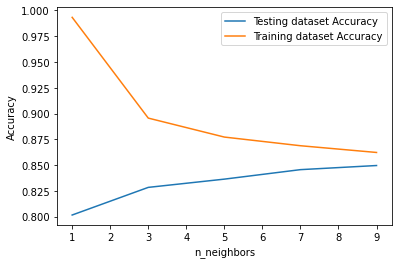

array([0.8016, 0.8284, 0.8364, 0.8456, 0.8496])

In [127]:
neighbors = [1,3,5,7,9]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
   
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    # Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
test_accuracy

In [128]:
n_neighbors = [20,25,40,50]
weights = ['uniform', 'distance']
leaf_size = [15,30,45]
p = [1,2,3]
hyperparams = {'weights': weights, 'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'p':p}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=5, scoring = "roc_auc")
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8234329917305592
KNeighborsClassifier(leaf_size=15, n_neighbors=25, p=1)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.8min finished


In [129]:
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = [20,25,40,50]
weights = ['uniform', 'distance']
leaf_size = [15,30,45]
p = [1,2,3]
hyperparams = {'weights': weights, 'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'p':p}
gd=RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = hyperparams, verbose=True, n_iter = 30,
                cv=5, scoring = "roc_auc",  random_state = 100)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8234329917305592
KNeighborsClassifier(leaf_size=15, n_neighbors=25, p=1)


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.3min finished


In [130]:
y_pred = gd.predict(X_test)

In [131]:
cohen_kappa_score(y_test,y_pred)

0.3983062093592791

### Random Forest Classification

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',random_state=100)
model

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=100)

In [134]:
XYZ = model.fit(X_train,y_train)

In [135]:
preds = model.predict(X_test)

In [136]:
confusion_matrix(y_test,preds)

array([[1876,  115],
       [ 242,  267]], dtype=int64)

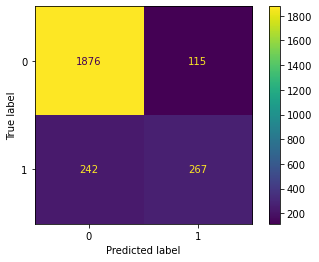

In [137]:
plot_confusion_matrix(model,X_test,y_test)

In [139]:
model.feature_importances_
pd.DataFrame(index=X_train.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.336054
Geography_Germany,0.020693
Is_Active_Member,0.036875
Balance,0.270676
Geography_France,0.011366
Gender_Male,0.010615
Gender_Female,0.009973
Num_Of_Products,0.134262
Geography_Spain,0.009353
Tenure,0.160134


In [140]:
cohen_kappa_score(y_test,preds)

0.5145826444123431

In [141]:
test_error = []

for n in range(25,1000,25):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

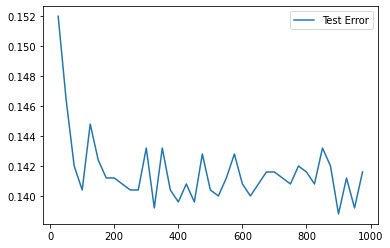

In [142]:
plt.plot(range(25,1000,25),test_error,label='Test Error')
plt.legend()

In [151]:
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier(random_state=100)
param_grid = {'n_estimators':[200,300,400],
             'max_features':[2,3,4,5,6],
             'bootstrap':[True, False],
             'oob_score':[True, False],
             'criterion':['gini','entropy'],
              'min_samples_split':[2,5,8,12],
              'min_samples_leaf': [1,2,3,4,5] } 
gsRFtree=RandomizedSearchCV(estimator = RFC, param_distributions = param_grid, verbose=True, n_iter = 20,
                cv=5, scoring = "accuracy")

gsRFtree.fit(X_train,y_train)

gsDtree_best = gsRFtree.best_estimator_

# Best score
gsRFtree.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.8min finished


0.8633333333333333

In [152]:
print(gsRFtree.best_estimator_.get_params())
print(gsRFtree.cv_results_['mean_test_score'])
pred = gsRFtree.predict(X_test)
print("Cohen Kappa Score:",cohen_kappa_score(y_test,pred))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': True, 'random_state': 100, 'verbose': 0, 'warm_start': False}
[0.8596     0.85506667 0.86133333 0.85786667        nan 0.85733333
 0.86186667 0.86026667        nan 0.85333333 0.84706667 0.86333333
 0.85213333 0.86333333        nan 0.8624     0.85133333 0.8488
 0.8496     0.8632    ]
Cohen Kappa Score: 0.540810629745422


In [145]:
gsRFtree.cv_results_

{'mean_fit_time': array([7.58070946e-03, 4.08403606e+00, 3.93585672e+00, 5.11357684e+00,
        6.68909435e+00, 5.63160491e+00, 3.19184532e+00, 6.80289268e-03,
        5.47199907e+00, 6.46610970e+00, 1.83677812e+00, 5.53030968e-03,
        2.98402700e+00, 6.80365562e-03, 7.42688179e-03, 2.04427967e+00,
        5.09749055e+00, 3.43243332e+00, 6.18047714e-03, 5.03001213e-03]),
 'std_fit_time': array([0.0051157 , 0.01988567, 0.19137528, 0.16737277, 0.07729369,
        0.26317593, 0.02117734, 0.00185311, 0.04408507, 0.02743585,
        0.19953042, 0.00203839, 0.01712201, 0.00396087, 0.0025283 ,
        0.13942929, 0.08381883, 0.01478161, 0.00567549, 0.00442794]),
 'mean_score_time': array([0.        , 0.24035869, 0.28368864, 0.21137419, 0.26537714,
        0.24899931, 0.18599496, 0.        , 0.19453669, 0.29511561,
        0.13541374, 0.        , 0.18756461, 0.        , 0.        ,
        0.13472795, 0.19826961, 0.20415263, 0.        , 0.        ]),
 'std_score_time': array([0.        , 

In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.75      0.50      0.60       509

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



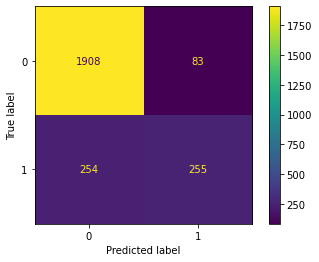

In [147]:
plot_confusion_matrix(gsRFtree,X_test,y_test)

### Boosted Trees

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {"n_estimators":[10,20,40,80,160,320],'max_depth':[3,4,5,6], 'max_features':['auto']}

In [157]:
gb_model = GradientBoostingClassifier()

In [158]:
grid = GridSearchCV(gb_model,param_grid)

In [159]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': ['auto'],
                         'n_estimators': [10, 20, 40, 80, 160, 320]})

In [160]:
grid.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 160}

In [161]:
preds = grid.predict(X_test)

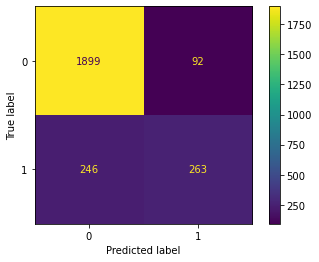

In [162]:
plot_confusion_matrix(grid,X_test,y_test)

In [163]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1991
           1       0.74      0.52      0.61       509

    accuracy                           0.86      2500
   macro avg       0.81      0.74      0.76      2500
weighted avg       0.86      0.86      0.86      2500



In [164]:
grid.best_estimator_.feature_importances_

array([0.38512788, 0.05870192, 0.10150775, 0.11923975, 0.00300617,
       0.00714099, 0.00746764, 0.30655762, 0.00105866, 0.01019162])

In [165]:
feat_import = grid.best_estimator_.feature_importances_

In [166]:
imp_feats = pd.DataFrame(index=X_train.columns,data=feat_import,columns=['Importance'])
imp_feats

,Importance
Age,0.385128
Geography_Germany,0.058702
Is_Active_Member,0.101508
Balance,0.119240
Geography_France,0.003006
Gender_Male,0.007141
Gender_Female,0.007468
Num_Of_Products,0.306558
Geography_Spain,0.001059
Tenure,0.010192


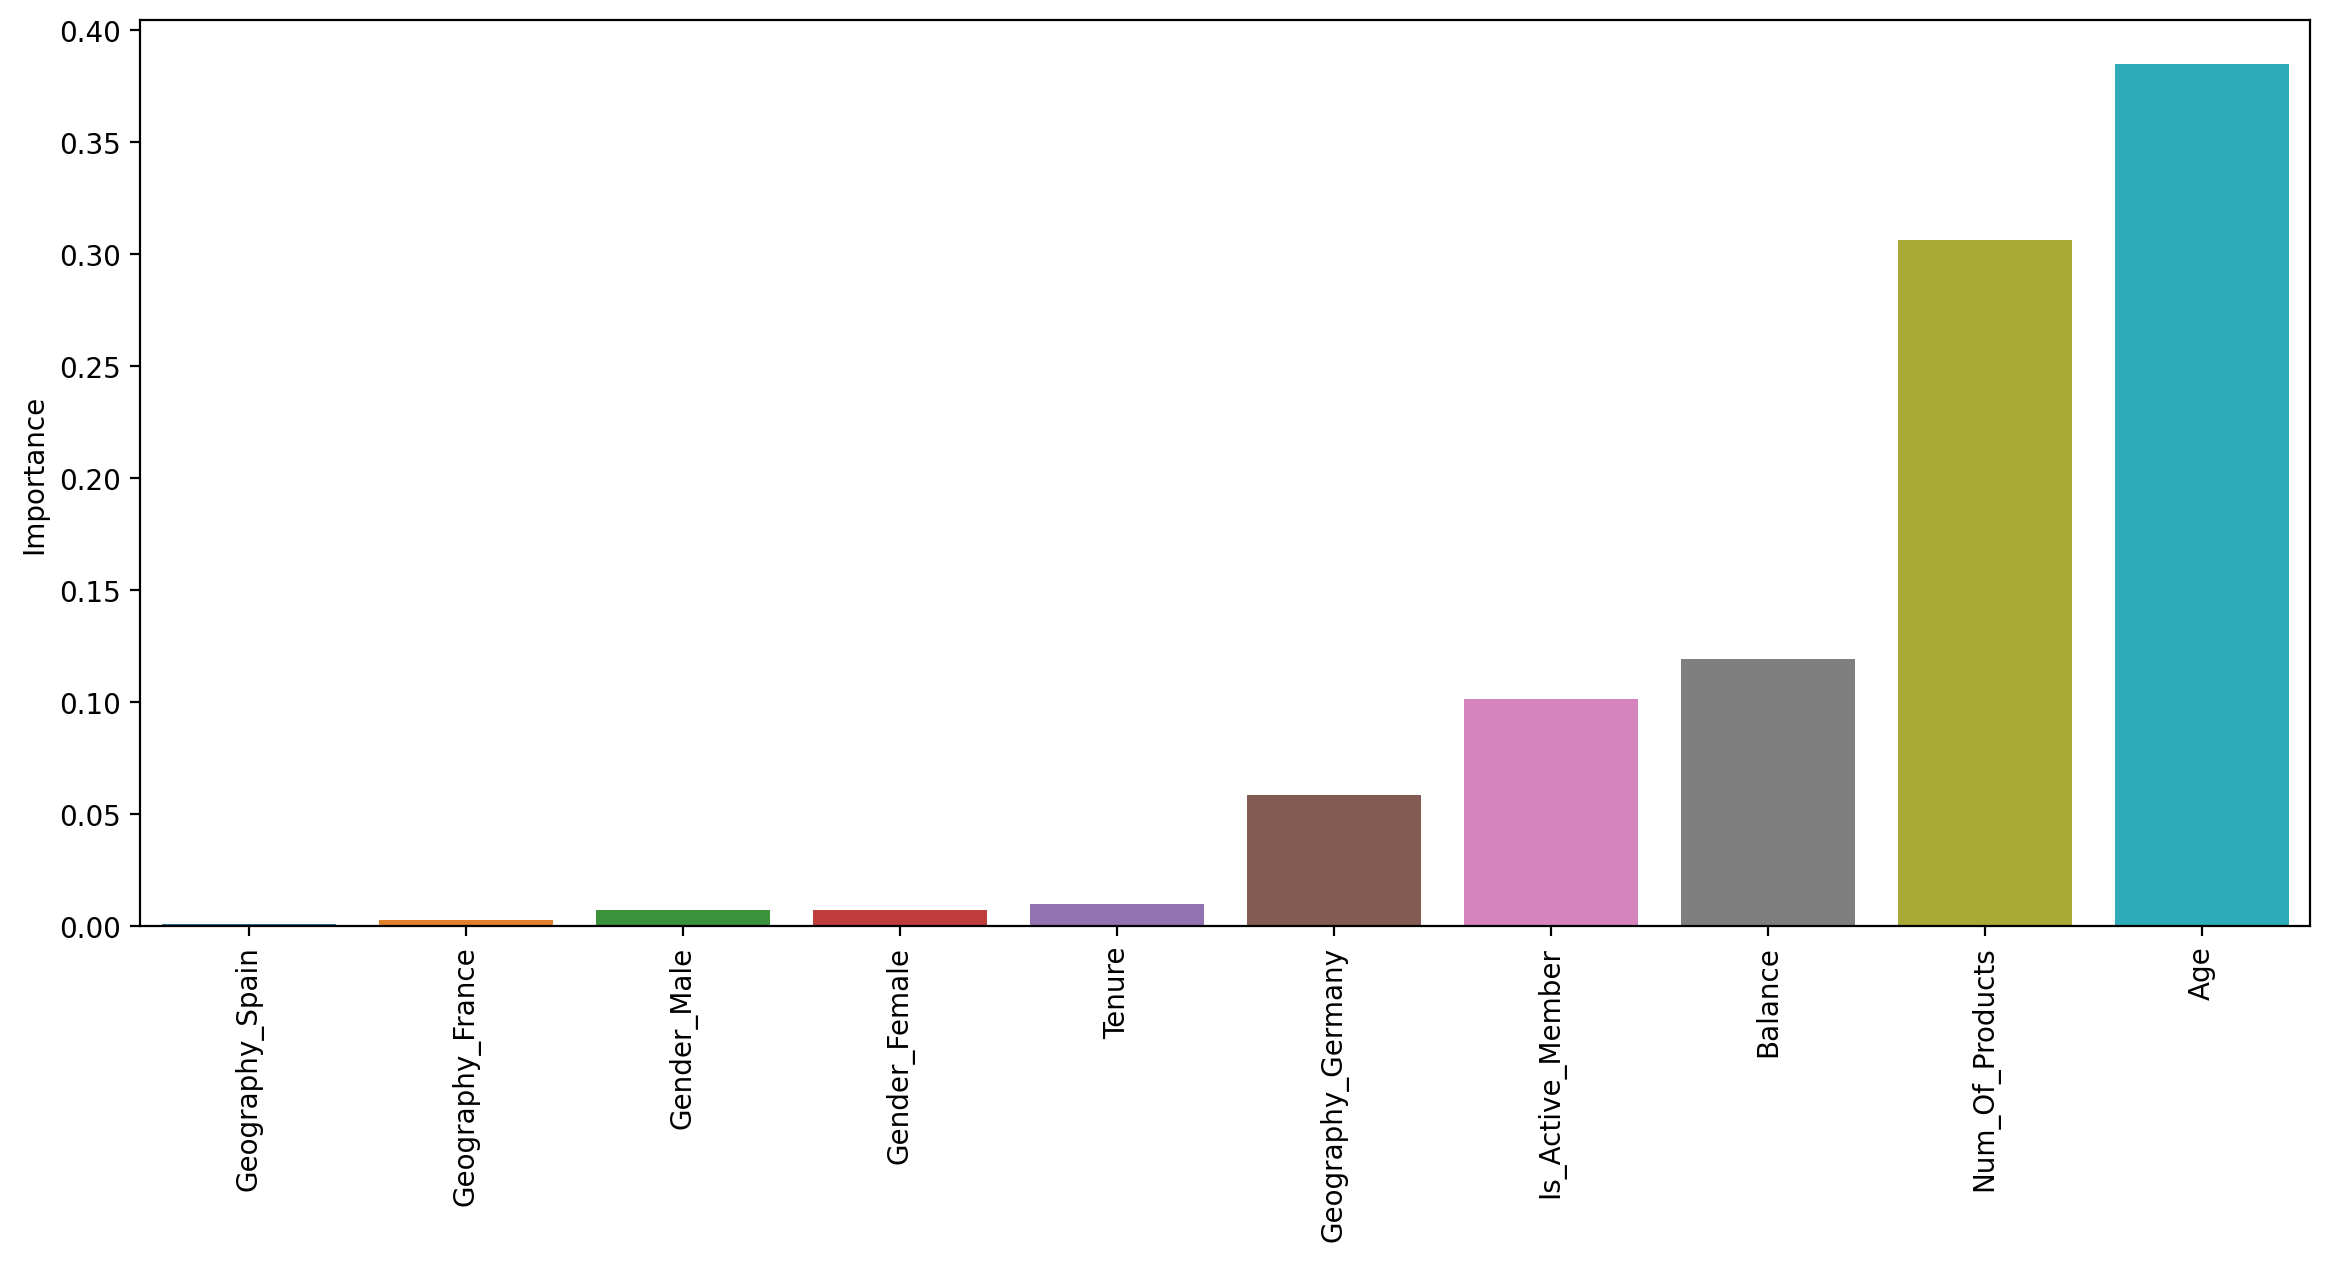

In [167]:
imp_feats.sort_values("Importance",ascending=False)
imp_feats.describe().transpose()
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]
imp_feats.sort_values('Importance')
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [178]:
cohen_kappa_score(y_test,preds)

0.5301927599646393

### XGBoost

In [188]:
pip install xgboost


  Using cached xgboost-1.6.0-py3-none-win_amd64.whl (126.1 MB)


In [189]:
from xgboost import XGBClassifier

In [190]:
model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=100, # number of trees, default = 100
                      eta=0.3, # this is learning rate, default = 0.3
                      max_depth=6, # maximum depth of the tree, default = 6
                      gamma = 0, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )

In [191]:
clf = model.fit(X_train, y_train)

In [192]:
preds = clf.predict(X_test)

In [193]:
cohen_kappa_score(y_test,preds)

0.5165226675963959

In [194]:
param_grid = {'eta':[0,0.2,0.4,0.6,0.8,1],'gamma':[0,1,2,4,8,16],"n_estimators":[1,5,10,20,40,100],'min_child_weight':[0,1,2,4,8,16],'max_depth':range(2,10),'subsample':[0,0.2,0.4,0.6,0.8,1]}
grid = RandomizedSearchCV(model,param_distributions=param_grid,scoring = 'accuracy',n_iter = 50)
grid.fit(X_train,y_train)
grid.best_params_

{'subsample': 0.4,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 3,
 'gamma': 8,
 'eta': 0.8}

In [195]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]

[0.866, 0.538, 0.742]

## **Interpretation**

## Kappa value interpretation Landis & Koch (1977):                           
<0 No agreement                                
0 — .20 Slight                                  
.21 — .40 Fair                                  
.41 — .60 Moderate                                 
.61 — .80 Substantial                            
.81–1.0 Perfect                                       


1. minimum and maximum age of the customer is 18,92
2. maximum tenure for the subscription is 10 months
3. minimum estimated salary is 11.58 ( which is not right)
4. 75% of the customers lies in the age group of 18-44 yrs



When we look at the gender and geographic distribution of estimated salary, we see that male customer estimated average salary is higher than females in France and Spain, however in Germany female customers’ estimated average salary is higher.

count of customers are more in france compared to other countries.
count of Male gender customers are relatively high compared to female customers.
count of exited is high in female gender customers compared to male gender customers.


basic perceptron:
cohen kappa score : 0.3046
for perceptron cohen kappa score is fair.

Logistic regression:
cohen kappa score : 0.29675
for logistic cohen kappa score is fair.

SGD Classifier:
cohen kappa score: 0.34450
for SGD Classifier , cohen kappa score is fair

KNN:
cohen kappa score : 0.39830
for knn, cohen kappa score is fair.

random forest:
cohen kappa score : 0.5145
for random forest, cohen kappa score is moderate.

boosted tree:
cohen kappa score: 0.530
for boosted tree, cohen kappa score is moderate.

xgboost:
cohen kappa score: 0.516552
for xgboost, cohen kappa score is moderate.

Therefore , As per my analysis I prefer boosted tree ( as it has highest accuracy among calculated.)